# Lab Week 4: Pandas DataFrame | Buenos Aires subway dataset

As a data analyst, you are examining public transportation accessibility in Buenos Aires, Argentina, for an upcoming project. You are particularly interested in the subway system as an efficient way to navigate the city. You will first focus on the Pueyrredon station on Line D of the subway and examine its ridership.

<div style="text-align: center;">
    <!-- <img src="imgs/subway_map_wcircle.jpg" alt="Subway map" width="600"/> -->
    <img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week4_Pandas/imgs/subway_map_wcircle.jpg" alt="Subway map" width="600"/>
    
</div>

<div style="text-align: center;">
    <a href="https://emova.com.ar/wp-content/uploads/2023/09/Mapa_Emova_2023-color-.jpg">image source</a>
</div>


## General instructions
- **Replace any instances of `None` with your own code**. All `None`s must be replaced.
- **Compare your results with the expected output** shown below the code.



# Imports

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the cell below to import the pandas module. Assign it the alias: <code>pd</code>.</li>
        </ol>
</div>

In [1]:
# import pandas here
import pandas as pd

# Part I : Pandas DataFrame

## Step I-1: Load the data

After importing `pandas` you will load the dataset as a pandas DataFrame. The CSV will have these features:

* `datetime` - hour and date the measurement was taken
* `line` - subway line
* `station`	- station name
* `pax_pagos` - number of passengers who paid with ticket (single-use ticket)
* `pax_pases_pagos` - number of passengers who paid with passes (e.g., monthly card, multi-ride pass)
* `pax_franq` - number of passengers who paid with deductibles (e.g., students, seniors, or other deductible categories)
* `pax_total` - total number of passengers who used the turnstile - equal to the sum of the three categories above (single + pass + discount)

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Load the CSV dataset to a variable <code>df</code>. The filename is <i>pueyrredon_march2024_8-11.csv</i></li>
            <li>Print the first 5 rows.</li>
        </ol>
</div>



In [2]:
### START CODE HERE ###
#Load the CSV to a DataFrame and save it in a variable called df.
df = pd.read_csv("pueyrredon_march2024_8-11.csv")

# Preview the first 5 rows.
df.head()

### END CODE HERE ###

,datetime,station,line,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL
0,2024-03-01 08:00:00,Pueyrredon.D,D,0,0,6,6
1,2024-03-01 09:00:00,Pueyrredon.D,D,0,0,5,5
2,2024-03-01 10:00:00,Pueyrredon.D,D,0,0,2,2
3,2024-03-01 11:00:00,Pueyrredon.D,D,0,0,3,3
4,2024-03-02 08:00:00,Pueyrredon.D,D,0,0,1,1


You can also use the `sample()` method to get some random data points to inspect.

In [ ]:
# Get 10 random samples
df.sample(10)

## Step I-2: Inspect the dataset


<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Get the columns from the dataset using the <code>columns</code> attribute and assign it to the <code>df_columns</code> variable.</li>
            <li>Get the data types using the <code>dtypes</code> attribute and assign it to the <code>df_dtypes</code> variable.</i></li>
            <li>Print the first 5 rows.</li>
        </ol>
</div>

In [3]:
### START CODE HERE ###

# Get the columns
df_columns = df.columns

# Get the datatypes
df_dtypes = df.dtypes

### END CODE HERE ###

print("The columns of the dataset are:", list(df_columns))
print("\nThe data types of each column are:\n")
print(df_dtypes)

The columns of the dataset are: ['datetime', 'station', 'line', 'pax_pagos', 'pax_pases_pagos', 'pax_franq', 'pax_TOTAL']

The data types of each column are:

datetime           object
station            object
line               object
pax_pagos           int64
pax_pases_pagos     int64
pax_franq           int64
pax_TOTAL           int64
dtype: object


Another way to extract these information is to use the `.info()` method. 

This also provides a `Non-Null Count` column that detects if there are any null values in the dataset.

In [4]:
# Print a summary of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   datetime         116 non-null    object
 1   station          116 non-null    object
 2   line             116 non-null    object
 3   pax_pagos        116 non-null    int64 
 4   pax_pases_pagos  116 non-null    int64 
 5   pax_franq        116 non-null    int64 
 6   pax_TOTAL        116 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 6.5+ KB


## Step I-3: Select columns

In real world data, you might receive a lot of features that you don't really need in your analysis. You might be interested in only a handful of features. 

You can select these specific columns in DataFrames to simplify your dataset. 

For example, in this use case, you don't find the `station` and `line` columns to be useful because they're the same for every row.

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Define a <code>columns</code> variable containing the list of features in <code>df</code> except <code>station</code> and <code>line</code>. You can use the output of <code>df_columns</code> earlier then just remove the two features mentioned.</li>
            <li>Select these columns from the <code>df</code> dataframe and assign it to the variable <code>df_pax</code>.</i></li>
            <li>Print the first 5 rows of this new dataframe.</li>
        </ol>
</div>

In [5]:
### START CODE HERE ###

# Get the list of features without `station` and `line`.
columns = ['datetime', 'pax_pagos', 'pax_pases_pagos', 'pax_franq', 'pax_TOTAL']

# Select the columns in the list above.
df_pax = df[columns]

# Preview the simplified DataFrame.
df_pax.head()

### END CODE HERE ###


,datetime,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL
0,2024-03-01 08:00:00,0,0,6,6
1,2024-03-01 09:00:00,0,0,5,5
2,2024-03-01 10:00:00,0,0,2,2
3,2024-03-01 11:00:00,0,0,3,3
4,2024-03-02 08:00:00,0,0,1,1



## Step I-4: Calculate the sum per column

You want to calculate how much each type of passenger payment contributes to the total passenger count. 

This can help you quantify how much discounted rates affects the total revenue for that particular month.

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the <code>sum()</code> method to count the total number of passengers under the <code>pax_pagos</code>, <code>pax_pases_pagos</code>, <code>pax_franq</code> and <code>pax_TOTAL</code> columns.</li>
        </ol>
</div>

In [6]:
### START CODE HERE ###

# Get the sum for `pax_pagos`
df_pax_pagos = df_pax['pax_pagos'].sum()

# Get the sum for `pax_pases_pagos`
df_pax_pases_pagos = df_pax['pax_pases_pagos'].sum()

# Get the sum for `pax_franq`
df_pax_franq = df_pax['pax_franq'].sum()

# Get the sum for `pax_TOTAL`
df_pax_total = df_pax['pax_TOTAL'].sum()

### END CODE HERE ###


print("Percent of `pax_pagos`:", (df_pax_pagos/df_pax_total*100))
print("Percent of `pax_pases_pagos`:", (df_pax_pases_pagos/df_pax_total*100))
print("Percent of `pax_franq`:", (df_pax_franq/df_pax_total*100))

Percent of `pax_pagos`: 93.89642215324294
Percent of `pax_pases_pagos`: 0.04247671949027937
Percent of `pax_franq`: 6.061101127266786



<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<br>

```text
Percent of `pax_pagos`: 93.89642215324294
Percent of `pax_pases_pagos`: 0.04247671949027937
Percent of `pax_franq`: 6.061101127266786

```



You can also get some preliminary visualization of the data. 

Say you want to visually inspect what is the typical total passenger count at these hours. 

You can use the `.hist()` method to do just that.

<Axes: >

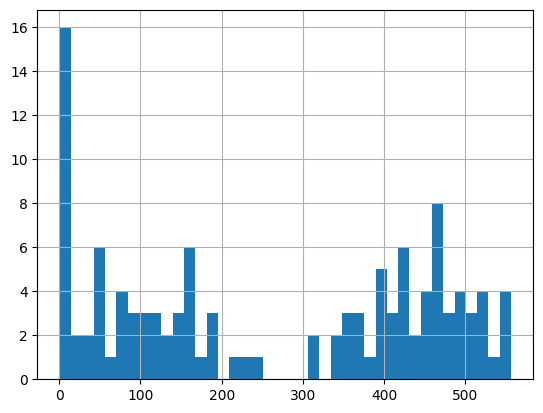

In [7]:
# Generate a histogram of `pax_TOTAL`.
df_pax["pax_TOTAL"].hist(bins=40)

You can see that there seems to be two clusters here divided along the 250 passenger mark. 

You can get a sense of how free or crowded the station can become at these hours by looking at the taller columns in the chart.

# Part II: Sorting and Filtering


## Step II-1: Load and sort the dataset

The cell below imports the CSV you will be working with. 

This data corresponds to the number of passengers at every station in the subway system of Buenos Aires in March 2024, with an hourly granularity. 

It consists of 5 features:

- `date`: date of the observation, in format YYYY-MM-DD
- `hour`: hour of the observation
- `station`: name of the subway station
- `line`: name of the subway line (A, B, C, D, E, H). Each line corresponds to one of the colored lines in the map above.
- `pax_TOTAL`: total number of passengers at the station 

In [8]:
import pandas as pd
df = pd.read_csv("march2024_pax_hourly.csv")
df.head()

,date,hour,station,line,pax_TOTAL
0,2024-03-01,5,Acoyte,A,50
1,2024-03-01,5,Aguero,D,1
2,2024-03-01,5,Alberti,A,6
3,2024-03-01,5,Angel Gallardo,B,30
4,2024-03-01,5,Avenida La Plata,E,26


The cell below prints the number of rows and unique stations in the DataFrame.

In [9]:
len(df)

49219

In [10]:
df['station'].unique()

array(['Acoyte', 'Aguero', 'Alberti', 'Angel Gallardo',
       'Avenida La Plata', 'Avenida de Mayo', 'Boedo', 'Bolivar',
       'Callao.B', 'Carabobo', 'Carlos Gardel', 'Carlos Pellegrini',
       'Caseros', 'Castro Barros', 'Catalinas', 'Congreso',
       'Constitucion', 'Cordoba', 'Correo Central', 'Corrientes',
       'Diagonal Norte', 'Dorrego', 'Echeverria', 'Emilio Mitre',
       'Entre Rios', 'Facultad de Derecho', 'Federico Lacroze', 'Flores',
       'Florida', 'General Belgrano', 'General San Martin', 'Hospitales',
       'Humberto I', 'Inclan', 'Independencia', 'Independencia.H',
       'Jose Maria Moreno', 'Jujuy', 'Las Heras', 'Lavalle',
       'Leandro N. Alem', 'Lima', 'Loria', 'Los Incas', 'Malabia',
       'Mariano Moreno', 'Medalla Milagrosa', 'Medrano',
       'Ministro Carranza', 'Once', 'Pasco', 'Pasteur', 'Patricios',
       'Peru', 'Pichincha', 'Piedras', 'Plaza Italia', 'Plaza Miserere',
       'Plaza de Mayo', 'Primera Junta', 'Puan', 'Pueyrredon',
       'Pza.

Now that you've seen some characteristics of the dataset, you want to sort it by `line` and `pax_TOTAL` so you can analyze the busiest times in each subway line.

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Define a <code>columns</code> variable to hold the list of features that you want to sort the dataset by. These will be by <code>line</code> first, then <code>pax_TOTAL</code>.
            <li>Define an <code>order</code> variable to contain boolean values. These will specify if you will sort a feature in ascending order or not. You will sort <code>line</code> <b>ascending</b>, then <code>pax_TOTAL</code> <b>descending</b>.
            <li>Use the <code>sort_values()</code> method to sort the <df> DataFrame by the columns in the orders you specified. Store the result in <code>df_sorted</code></li>
        </ol>
</div>

In [11]:
### START CODE HERE ###

# 1. Define the columns to sort by: first 'line', then 'pax_TOTAL'
columns = ['line', 'pax_TOTAL']

# 2. Define the sorting order: True = ascending, False = descending
# 'line' ascending, 'pax_TOTAL' descending
order = [True, False]

# 3. Sort the dataframe
df_sorted = df.sort_values(by=columns, ascending=order)

### END CODE HERE ###

# Preview the results
df_sorted.head()


,date,hour,station,line,pax_TOTAL
40234,2024-03-26,8,San Pedrito,A,4252
32079,2024-03-21,8,San Pedrito,A,4179
28713,2024-03-19,8,San Pedrito,A,4169
41920,2024-03-27,8,San Pedrito,A,4099
38548,2024-03-25,8,San Pedrito,A,4081


## Step II-2: Filter a subway line

Now that you have the sorted dataset, you can filter a subway line and it will return a sorted dataset by total passengers.

For this exercise, you will filter line `E`.

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Filter <code>df_sorted</code> for data points that are in <b>line E</b>.
        </ol>
</div>

In [12]:
# You can change this later if you want. You can choose from: [A, B, C, D, E, H].
line = 'E'

### START CODE HERE ###

# Define the line we want to filter
line = 'E'

# Filter `df_sorted` for rows that match the line specified
df_filter_line = df_sorted[df_sorted['line'] == line]

### END CODE HERE ###

# Print some info
print("number of rows:", len(df_filter_line))
print("stations in this DataFrame:", df_filter_line['station'].unique())

# Preview the result
df_filter_line.head()


number of rows: 10135
stations in this DataFrame: ['Independencia.H' 'Bolivar' 'Pza. de los Virreyes' 'Catalinas'
 'Correo Central' 'General Belgrano' 'Avenida La Plata' 'Emilio Mitre'
 'Jose Maria Moreno' 'Retiro E' 'Boedo' 'Urquiza' 'San Jose' 'Entre Rios'
 'Varela' 'Medalla Milagrosa' 'Pichincha' 'Jujuy']


,date,hour,station,line,pax_TOTAL
15805,2024-03-11,12,Independencia.H,E,2371
29029,2024-03-19,12,Independencia.H,E,2283
27345,2024-03-18,12,Independencia.H,E,2226
29442,2024-03-19,17,Bolivar,E,2195
16218,2024-03-11,17,Bolivar,E,2192



<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

```text
number of rows: 10135

stations in this DataFrame:
['Independencia.H' 'Bolivar' 'Pza. de los Virreyes' 'Catalinas'
 'Correo Central' 'General Belgrano' 'Avenida La Plata' 'Emilio Mitre'
 'Jose Maria Moreno' 'Retiro E' 'Boedo' 'Urquiza' 'San Jose' 'Entre Rios'
 'Varela' 'Medalla Milagrosa' 'Pichincha' 'Jujuy']
```



If you look at the resulting DataFrame, every row should have the `line` column equals `E`.

In [13]:
# Preview the result
df_filter_line.head()

,date,hour,station,line,pax_TOTAL
15805,2024-03-11,12,Independencia.H,E,2371
29029,2024-03-19,12,Independencia.H,E,2283
27345,2024-03-18,12,Independencia.H,E,2226
29442,2024-03-19,17,Bolivar,E,2195
16218,2024-03-11,17,Bolivar,E,2192


## Step II-3: Select top rows

You only want the most crowded times so you need to reduce the dataset. 

There are many ways to do this but for this exercise, you will practice slicing the dataset to select a range of rows.

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Use the <code>iloc()</code> method on <code>df_filter_line</code> to slice the first 500 rows. Assign the result to the <code>df_sliced</code> variable. (<i>Note: You know you can also do this with <code>head()</code> but avoid doing that for now.</i>)
        </ol>
</div>

In [14]:
### START CODE HERE ###

# Slice the first 500 rows using iloc
df_sliced = df_filter_line.iloc[:500]

### END CODE HERE ###

print("number of rows: ", len(df_sliced))
print("stations in this DataFrame: ", df_sliced['station'].unique())

# Preview the result
df_sliced.head()


number of rows:  500
stations in this DataFrame:  ['Independencia.H' 'Bolivar' 'Pza. de los Virreyes' 'Catalinas'
 'Correo Central' 'General Belgrano' 'Avenida La Plata' 'Emilio Mitre'
 'Jose Maria Moreno' 'Retiro E' 'Boedo']


,date,hour,station,line,pax_TOTAL
15805,2024-03-11,12,Independencia.H,E,2371
29029,2024-03-19,12,Independencia.H,E,2283
27345,2024-03-18,12,Independencia.H,E,2226
29442,2024-03-19,17,Bolivar,E,2195
16218,2024-03-11,17,Bolivar,E,2192



<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

```text
number of rows: 500

stations in this DataFrame:
['Independencia.H' 'Bolivar' 'Pza. de los Virreyes' 'Catalinas'
 'Correo Central' 'General Belgrano' 'Avenida La Plata' 'Emilio Mitre'
 'Jose Maria Moreno' 'Retiro E' 'Boedo']
```




## Step II-4: Filter rush hours

Now you have a subset of the data containing the top 500 data points by total number of passengers. 

If you want to know what times these usually occur, you can plot a histogram of the 'hour' feature and see which hours have the highest peaks.

<Axes: >

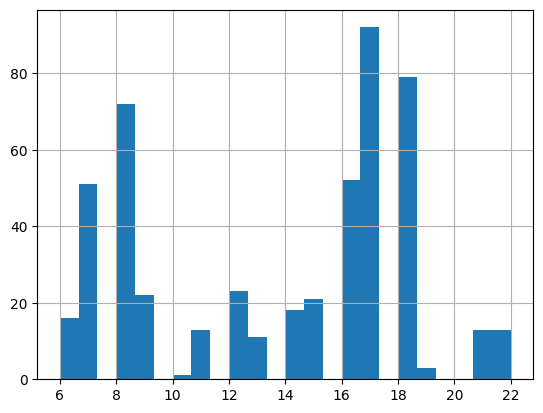

In [15]:
# Visualize when the busiest times occur
df_sliced['hour'].hist(bins=24)

The chart show several peaks and you want to focus on the afternoon rush hour between 16:00 to 18:00.

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    <strong>▶▶▶ Directions</strong> 
        <ol>
            <li>Filter <code>df_sliced</code> by two conditions: 'hour' should be greater than or equal to 16, and should be less than or equal to 18. Assign the result to the <code>df_filter_pm</code> variable.
        </ol>
</div>

In [16]:
### START CODE HERE ###

# Filter for rows where 'hour' is between 16 and 18 (inclusive)
df_filter_pm = df_sliced[(df_sliced['hour'] >= 16) & (df_sliced['hour'] <= 18)]

### END CODE HERE ###

print("number of rows: ", len(df_filter_pm))
print("stations in this DataFrame: ", df_filter_pm['station'].unique())

# Preview the first few results
df_filter_pm.head()


number of rows:  223
stations in this DataFrame:  ['Bolivar' 'Independencia.H' 'Catalinas' 'Correo Central'
 'General Belgrano' 'Retiro E']


,date,hour,station,line,pax_TOTAL
29442,2024-03-19,17,Bolivar,E,2195
16218,2024-03-11,17,Bolivar,E,2192
40965,2024-03-26,17,Bolivar,E,2187
39281,2024-03-25,17,Bolivar,E,2143
921,2024-03-01,17,Bolivar,E,2122



<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

```text
number of rows: 223

stations in this DataFrame:
['Bolivar' 'Independencia.H' 'Catalinas' 'Correo Central'
 'General Belgrano' 'Retiro E']
```




Great! Now you see these 6 stations are the busiest based on the criteria you specified. 

You can recommend these to your stakeholders as the ones needing the most attention during these hours. 🤓

# Part III: Descriptive Statistics

## Step III-1: Filter the data


You want to calculate numbers for extreme conditions so you decide to filter the dataset.

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
    
**▶▶▶ Directions**
1. Use your `df` DataFrame from `Part II`. 
1. Use the `quantile()` method to get the 0.95 quantile of the `pax_TOTAL`. Store it in the <code>pax_95q</code> variable.

</div>

In [17]:
### START CODE HERE ###

# Get the 95th percentile of the total passengers
pax_95q = df['pax_TOTAL'].quantile(0.95)

### END CODE HERE ###

# Filter the dataset
df_95q = df[df["pax_TOTAL"] > pax_95q]

# Sort the dataset by pax_TOTAL (descending)
df_95q = df_95q.sort_values(by="pax_TOTAL", ascending=False)

# Print the number of rows
print("rows in this dataset:", len(df_95q))

# Preview the first few rows
df_95q.head()


rows in this dataset: 2461


,date,hour,station,line,pax_TOTAL
40175,2024-03-26,8,Constitucion,C,13651
28654,2024-03-19,8,Constitucion,C,13281
26970,2024-03-18,8,Constitucion,C,13157
32020,2024-03-21,8,Constitucion,C,13103
41861,2024-03-27,8,Constitucion,C,13024



<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

```txt
rows in this dataset: 2461
```




## Step III-2: Descriptive statistics

Now you calculate some numbers to see how many passengers are in these busy conditions.

<a id="do-it-yourself"></a>

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions** 
1. Find the mean of total passengers in the <code>df_95q</code> DataFrame.
2. Find the median of total passengers in the <code>df_95q</code> DataFrame.
3. Find the maximum number of passengers in the <code>df_95q</code> DataFrame.
4. Find the standard deviation of passengers in the <code>df_95q</code> DataFrame.
</div>



In [18]:
### START CODE HERE ###

# find the mean, median, max, and standard deviation of pax_TOTAL
pax_mean = df_95q["pax_TOTAL"].mean()
pax_median = df_95q["pax_TOTAL"].median()
pax_max = df_95q["pax_TOTAL"].max()
pax_std = df_95q["pax_TOTAL"].std()

### END CODE HERE ###

print("The mean pax is:", pax_mean)
print("The median pax is:", pax_median)
print("The max pax is:", pax_max)
print("The standard deviation is:", pax_std)


The mean pax is: 2034.19179195449
The median pax is: 1580.0
The max pax is: 13651
The standard deviation is: 1429.2539690049282



<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

```txt
The mean pax is: 2034.19179195449
The median pax is: 1580.0
The max pax is: 13651
The standard deviation is: 1429.2539690049282
```




## Step III-3: Plot the station counts

You want to know the top stations that encounter this kind of passenger traffic.

<a id="do-it-yourself"></a>

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions** 
1. Use the <code>value_counts()</code> on the 'station' column of the <code>df_95q</code> DataFrame.
2. Use the <code>head()</code> method to get the top 10 results.
3. Use the <code>plot(kind="bar")</code> method to display the results as a bar chart.
</div>



<Axes: title={'center': 'Top 10 Stations by Passenger Traffic'}, xlabel='station'>

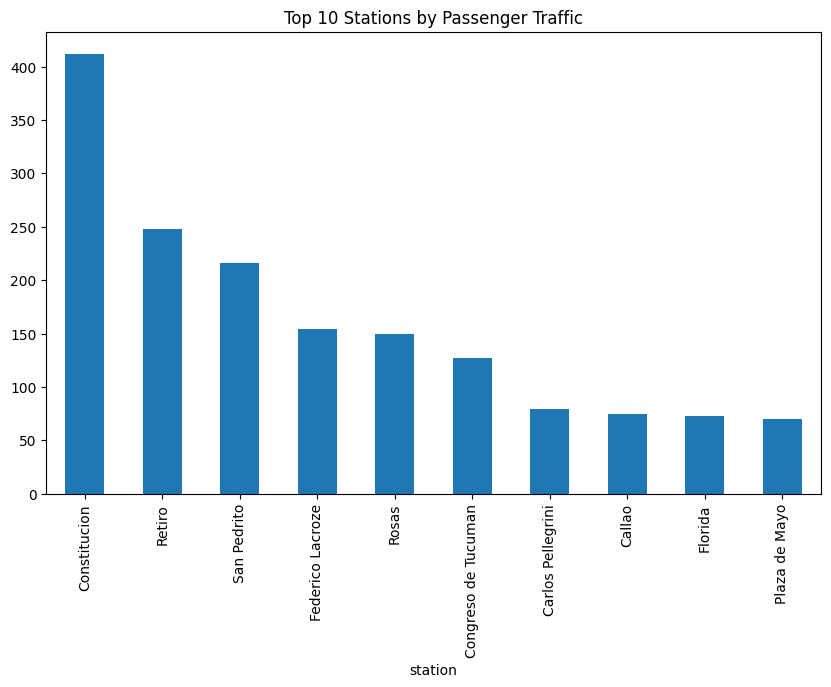

In [19]:
### START CODE HERE ###

# Get the value counts per station
station_counts = df_95q['station'].value_counts()

# Get the top 10 results
station_counts_10 = station_counts.head(10)

# Plot the top 10 results
station_counts_10.plot(kind="bar", figsize=(10,6), title="Top 10 Stations by Passenger Traffic")

### END CODE HERE ###



## Step III-4: Statistics per station

Next, you want to plot some statistics segmented per station. You will calculate the mean and return the results as a series. 

<a id="do-it-yourself"></a>

<div style="background-color: #C6E2FF; color: #1a1a1a; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions** 
1. Use the <code>groupby()</code> method to segment the data by 'station' of the <code>df_95q</code> DataFrame. Store the results in <code>grouped_by_station</code>
2. Use the <code>mean()</code> method on the 'pax_TOTAL' column of the <code>grouped_by_station</code> object. Store the results in <code>mean_per_station</code>
</div>

In [20]:
### START CODE HERE ###

# Segment the data by station
grouped_by_station = df_95q.groupby('station')

# Calculate the mean of the 'pax_TOTAL' column per station
mean_per_station = grouped_by_station['pax_TOTAL'].mean()

### END CODE HERE ###

# Sort the results and only print the top 10
mean_per_station.sort_values(ascending=False).head(10)


station
Constitucion        3603.701456
Catedral            2134.927536
Plaza de Mayo       2067.885714
Retiro              1991.120968
Rosas               1982.820000
San Pedrito         1926.078704
Saenz Pena          1910.250000
Hospitales          1892.000000
Leandro N. Alem     1888.698413
Federico Lacroze    1830.571429
Name: pax_TOTAL, dtype: float64


<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

```txt
station
Constitucion        3603.701456
Catedral            2134.927536
Plaza de Mayo       2067.885714
Retiro              1991.120968
Rosas               1982.820000
San Pedrito         1926.078704
Saenz Pena          1910.250000
Hospitales          1892.000000
Leandro N. Alem     1888.698413
Federico Lacroze    1830.571429
Name: pax_TOTAL, dtype: float64
```

